# Homework 2

## Question 1

#### Consider the following 1-d dataset with 5 points $ X = \{-1, 1, 10, -0,5, 0 \} $, on which we are going to perform Gaussian density estimation. For the exercise below, you may use Python for plotting but all the calculations have to be done by hand.

- Compute the Maximum Likelihood Estimate (MLE) of the mean and variance. For the variance, compute both the unbiased and biased
versions. Comment on what you observe. In particular, how does the presence of an outlier aect your estimates.

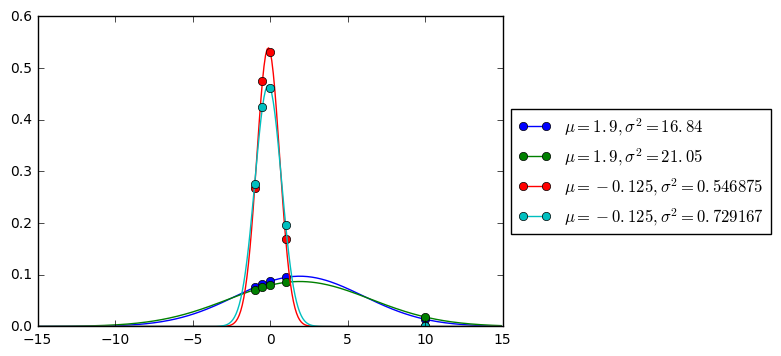

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp( - (x - mu)**2 / (2 * var) )

x = [-1, 1, 10, -0.5, 0]
r = np.arange(-15, 15, 0.1)
l = sorted(set(np.append(r, x)))
p = np.asarray(l)

for mu, var in [(1.9, 16.84), (1.9, 21.05), (-0.125, 0.546875), (-0.125, 0.729167)]:
    plt.plot(p, gaussian(p, mu, var), '-o', markevery=[l.index(e) for e in x], label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Assume that you have a $ \mathcal{N}(0, 1) $ prior over the mean parameter and set the standard deviation $ \sigma^{2} = 1 $. Compute the posterior distribution of the mean parameter and plot both the prior and the posterior distributions. Comment on what you observe.

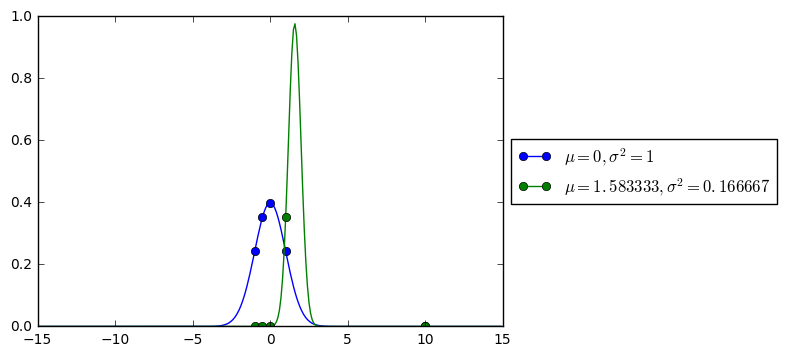

In [2]:
for mu, var in [(0, 1), (1.583333, 0.166667)]:
    plt.plot(p, gaussian(p, mu, var), '-o', markevery=[l.index(e) for e in x], label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Now suppose we change the prior over the mean parameter to $ \mathcal{N}(10, 1) $. Compute the new posterior distribution, plot it, and contrast it with what you observed previously.

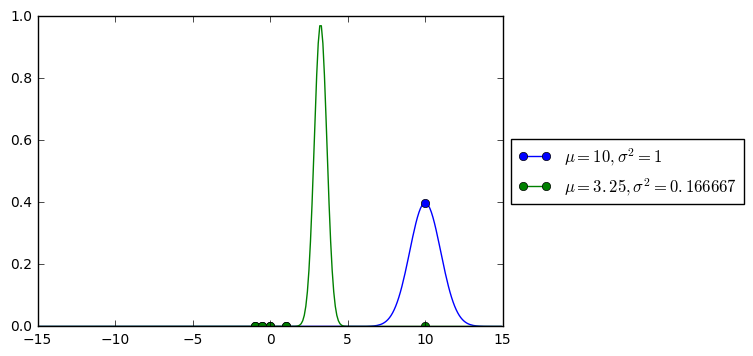

In [3]:
for mu, var in [(10, 1), (3.25, 0.166667)]:
    plt.plot(p, gaussian(p, mu, var), '-o', markevery=[l.index(e) for e in x], label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Suppose 2 more data points get added to your dataset: $$ X = \{-1, 1, 10, -0.5, 0, 2, 0.5 \}$$
Using the same \mathcal{N}(0, 1) prior over the mean parameter, compute and plot the posterior. How does observing new data points afect the posterior?

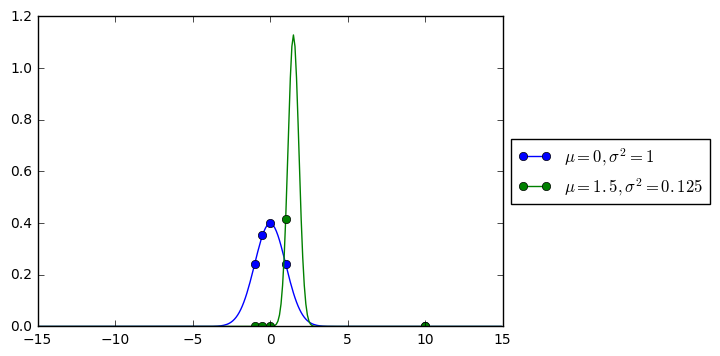

In [4]:
for mu, var in [(0, 1), (1.5, 0.125)]:
    plt.plot(p, gaussian(p, mu, var), '-o', markevery=[l.index(e) for e in x], label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Question 2